### Momentum Break Resistance Strategy

In [1]:
import datetime as dt
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.min_rows", 500)
pd.set_option("display.max_rows", 500)
pd.set_option("precision", 3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

%matplotlib inline

In [3]:
data_df = yf.download('SPY', dt.datetime(2002,11,1),dt.datetime(2021,10,31))

[*********************100%***********************]  1 of 1 completed


In [4]:
data_df['log returns'] = np.log(data_df['Adj Close']/data_df['Adj Close'].shift(1))
data_df['Date'] = data_df.index

In [5]:
def get_res(temp_df,candles):
    global pivots_resist
    global pivot_dates_resist
    global date_detected_resist #to ensure date detected is after resistance date
    
    pivots_resist =[]
    pivot_dates_resist = []
    date_detected_resist = []
    value_range = [0]*candles
    date_range = [0]*candles
    max_counter =0
    min_counter = 0

    for i in temp_df.index:

        max_value = max(value_range)
    
        value_range = value_range[1:candles]
        value_range.append(round(temp_df['Adj Close'][i],2))
    
        date_range=date_range[1:candles]
        date_range.append(temp_df['Date'][i])
    
        if max_value==max(value_range):
            max_counter+=1
        
        if max_value<max(value_range):
            max_counter =0

        if max_counter ==(candles/2): #When price is remains at high point x/2 days in a row, mark as resist
            date_index = value_range.index(max_value)
            date_pivot = date_range[date_index]
            
            pivots_resist.append(max_value)
            pivot_dates_resist.append(date_pivot)
            date_detected_resist.append(temp_df['Date'][i])

    df_resist = pd.DataFrame({'dates': pivot_dates_resist, 'Res_level': pivots_resist, 'date_detected': date_detected_resist})
    
    return df_resist

In [6]:
pivot_resist_df = get_res(data_df,6)
pivot_resist_df

,dates,Res_level,date_detected
0,2002-11-06,64.100,2002-11-11
1,2002-11-21,64.830,2002-11-26
2,2002-11-27,64.960,2002-12-03
3,2003-01-06,64.360,2003-01-09
4,2003-01-14,64.620,2003-01-17
5,2003-02-18,59.290,2003-02-21
6,2003-03-21,62.340,2003-03-26
7,2003-04-04,61.330,2003-04-09
8,2003-04-15,62.410,2003-04-21
9,2003-04-23,64.080,2003-04-28


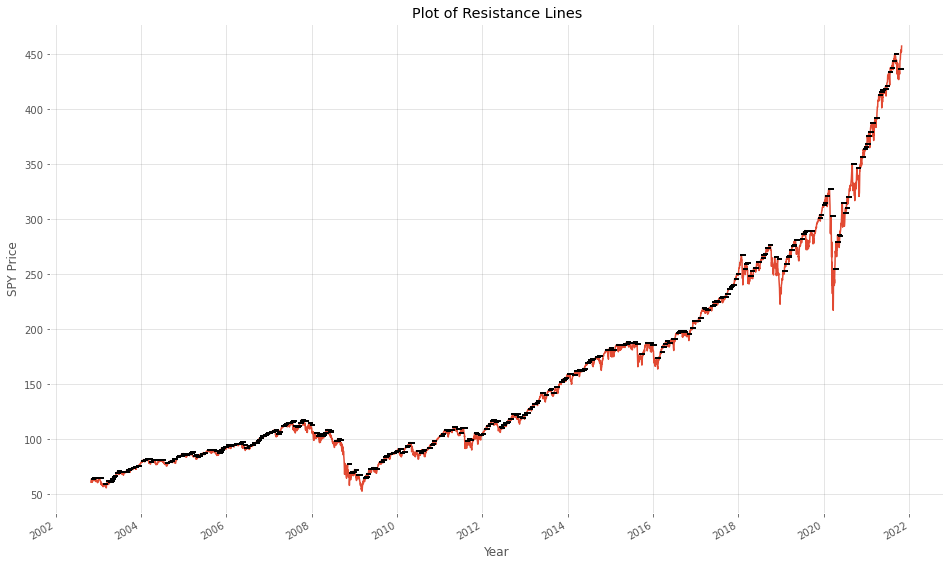

In [7]:
data_df['Adj Close'].plot(figsize=(16,10))
plt.title('Plot of Resistance Lines')
plt.ylabel('SPY Price')
plt.xlabel('Year')

plt.plot([pivot_resist_df['dates'],pivot_resist_df['dates']+dt.timedelta(30)],[pivot_resist_df['Res_level'],pivot_resist_df['Res_level']],color='black',linewidth=2,marker=',');

In [8]:
def break_resist(df,pivot_resist_df,delta_time,res_delta):
    #delta time is the time before we consider a marked resistance obsolete
    #res delta is the number of days before price high point is marked as a resistance
    
    break_resist_suc_count = 0
    break_resist_loss_count = 0
    
    break_resist_columns = ['buy_date','sell_date','Ticker','Res_level','decision','delta_time', 'upper_limit','pre-entry-candle','break_candle','prev_close_D5','Res_date','Res_detected','Res_delta']
    
    break_resist_df = pd.DataFrame(columns = break_resist_columns)
    
    df.reset_index(inplace=True,drop=True)
    
    df['Date'] = pd.DatetimeIndex(df['Date'])
    
    for t in delta_time:
                for x in range(len(pivot_resist_df)):
                    price1 = pivot_resist_df['Res_level'][x]
                    upper_limit = price1*1.02
                    # upper limit is point where we consider the price to truly break the resistance level
                    
                    Date1 = pivot_resist_df['date_detected'][x]
                    df['dates_to_end'] = df['Date'] > Date1
                    
                    #To ensure that the date in dataframe is past the resistance date
                    
                    for i in range(len(df.index)):
                        if df['dates_to_end'][i]==True:
                            if df['Adj Close'][i]>=(upper_limit) and df['prev_close'][i]<(upper_limit): #ensuring a break from bottom to up
                                if df['prev_close_5'][i]<df['Adj Close'][i]: 
                                
                                #prev_close_D5 is an added precaution to ensure that the price was at a lower point 5 days ago and makes a break rather than a u-turn from a higher point
                                
                                    break_buy_date = df['Date'][i]
                                    break_candle = df['Adj Close'][i]
                                    
                                    df['Dates after bought']= (df['Date']>break_buy_date)
                    
                                    for y in range(len(df.index)):
                                    
                                        if df['Dates after bought'][y] == True:
                                        
                                            if df['Adj Close'][y]>=upper_limit*1.2:
                                                #exit signal at +20%
                                            
                                                break_resist_suc_count +=1
                                                break_resist_df = break_resist_df.append(pd.Series([break_buy_date,df['Date'][y],ticker,price1,1,
                                                                                                    t,upper_limit,
                                                                                                    df['prev_close'][i],break_candle,df['prev_close_5'][i],
                                                                                                    pivot_resist_df['dates'][x],Date1,res_delta],
                                                                                                    index=break_resist_columns),ignore_index=True)
                                                
                                                break
                                            
                                            if df['Adj Close'][y]<=upper_limit*0.95:
                                                #exit signal at -5%

                                                break_resist_loss_count +=1
                                                break_resist_df = break_resist_df.append(pd.Series([break_buy_date,df['Date'][y],ticker,price1,1,
                                                                                                    t,upper_limit,
                                                                                                    df['prev_close'][i],break_candle,df['prev_close_5'][i],
                                                                                                    pivot_resist_df['dates'][x],Date1,res_delta],
                                                                                                    index=break_resist_columns),ignore_index=True)
                                                break
                                    break

    print(f'success ratio: {round(break_resist_suc_count/(break_resist_suc_count+break_resist_loss_count)*100,2)}%')
    
    return break_resist_df

In [9]:
ticker = 'SPY'

df = data_df[['Date','Adj Close','log returns']].copy()
    
df['Ticker']= ticker
    
df['prev_close']= df['Adj Close'].shift(1)

df['prev_close_5']= df['Adj Close'].shift(5)
    
delta_time = [720]
res_delta = '3 days'
    
break_resist_df = break_resist(df,pivot_resist_df,delta_time,res_delta)

display(break_resist_df)

success ratio: 56.76%


,buy_date,sell_date,Ticker,Res_level,decision,delta_time,upper_limit,pre-entry-candle,break_candle,prev_close_D5,Res_date,Res_detected,Res_delta
0,2003-05-12,2004-01-05,SPY,64.100,1,720,65.382,65.158,65.957,64.671,2002-11-06,2002-11-11,3 days
1,2003-05-27,2004-01-07,SPY,64.830,1,720,66.127,65.179,66.319,64.407,2002-11-21,2002-11-26,3 days
2,2003-05-27,2004-01-08,SPY,64.960,1,720,66.259,65.179,66.319,64.407,2002-11-27,2002-12-03,3 days
3,2003-05-12,2004-01-05,SPY,64.360,1,720,65.647,65.158,65.957,64.671,2003-01-06,2003-01-09,3 days
4,2003-05-12,2004-01-05,SPY,64.620,1,720,65.912,65.158,65.957,64.671,2003-01-14,2003-01-17,3 days
5,2003-03-19,2003-09-18,SPY,59.290,1,720,60.476,60.437,60.901,56.124,2003-02-18,2003-02-21,3 days
6,2003-04-23,2003-12-18,SPY,62.340,1,720,63.587,63.496,64.080,62.412,2003-03-21,2003-03-26,3 days
7,2003-04-22,2003-12-01,SPY,61.330,1,720,62.557,62.321,63.496,61.835,2003-04-04,2003-04-09,3 days
8,2003-04-23,2003-12-18,SPY,62.410,1,720,63.658,63.496,64.080,62.412,2003-04-15,2003-04-21,3 days
9,2003-05-12,2004-01-05,SPY,64.080,1,720,65.362,65.158,65.957,64.671,2003-04-23,2003-04-28,3 days


In [10]:
data_df['signal'] = 0
for x in range(len(break_resist_df)):
    data_df.loc[break_resist_df['buy_date'][x]:break_resist_df['sell_date'][x]]['signal'] = 1

Text(0.5, 1.0, 'Returns')

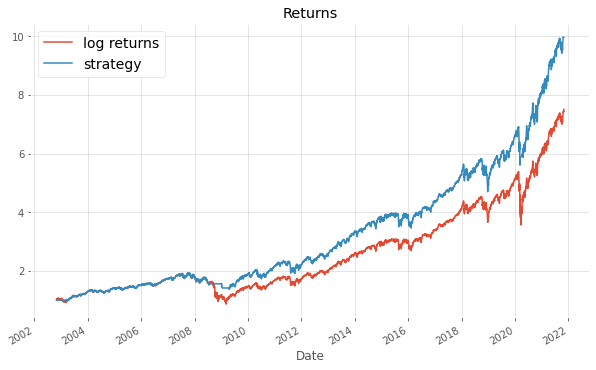

In [11]:
data_df['strategy'] = data_df['signal'].shift(1)*data_df['log returns']

data_df[['log returns','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))
plt.title('Returns')

In [12]:
Total_Strat_Returns = np.exp(data_df['strategy'].sum())
Total_Strat_Returns

9.963717970282483

In [13]:
data_df_2 = data_df[['Adj Close','signal','strategy']].copy()

data_df_2['spy returns'] = np.log(data_df_2['Adj Close']/data_df_2['Adj Close'].shift(1))

data_df_2.dropna(inplace=True)

data_df_2

,Adj Close,signal,strategy,spy returns
Date,,,,
2002-11-01,62.195,0,0.000,0.020
2002-11-04,62.787,0,0.000,0.009
2002-11-05,63.283,0,0.000,0.008
2002-11-06,64.103,0,0.000,0.013
2002-11-07,62.532,0,-0.000,-0.025
2002-11-08,61.768,0,-0.000,-0.012
2002-11-11,60.810,0,-0.000,-0.016
2002-11-12,61.292,0,0.000,0.008
2002-11-13,61.354,0,0.000,0.001


In [14]:
initial_capital = 500000

data_df_2['potential_stocks_to_buy'] = 0

data_df_2.loc['2002-11-01':'2008-12-31']['potential_stocks_to_buy']= 8100
data_df_2.loc['2009-01-01':'2014-12-31']['potential_stocks_to_buy']= 10600
data_df_2.loc['2015-01-01':]['potential_stocks_to_buy'] = 10300

data_df_2['our_stock_holdings'] = data_df_2['signal'].shift(1)*data_df_2['potential_stocks_to_buy']

difference_in_shares_owned = data_df_2['our_stock_holdings'].diff()

difference_in_shares_owned.dropna(inplace=True)

data_df_2['stock_value'] = data_df_2['our_stock_holdings']* data_df_2['Adj Close']

data_df_2['diff shares'] = difference_in_shares_owned

data_df_2['total_cash'] = initial_capital - (difference_in_shares_owned.multiply(data_df_2["Adj Close"],
                                                                              axis = 0)).cumsum()

data_df_2['total_port_value'] = data_df_2['total_cash']+ data_df_2['our_stock_holdings']

data_df_2['pct_change']= data_df_2['total_port_value'].pct_change()

data_df_2

,Adj Close,signal,strategy,spy returns,potential_stocks_to_buy,our_stock_holdings,stock_value,diff shares,total_cash,total_port_value,pct_change
Date,,,,,,,,,,,
2002-11-01,62.195,0,0.000,0.020,8100,NaN,NaN,NaN,NaN,NaN,NaN
2002-11-04,62.787,0,0.000,0.009,8100,0.000,0.000,NaN,NaN,NaN,NaN
2002-11-05,63.283,0,0.000,0.008,8100,0.000,0.000,0.000,500000.000,500000.000,NaN
2002-11-06,64.103,0,0.000,0.013,8100,0.000,0.000,0.000,500000.000,500000.000,0.000
2002-11-07,62.532,0,-0.000,-0.025,8100,0.000,0.000,0.000,500000.000,500000.000,0.000
2002-11-08,61.768,0,-0.000,-0.012,8100,0.000,0.000,0.000,500000.000,500000.000,0.000
2002-11-11,60.810,0,-0.000,-0.016,8100,0.000,0.000,0.000,500000.000,500000.000,0.000
2002-11-12,61.292,0,0.000,0.008,8100,0.000,0.000,0.000,500000.000,500000.000,0.000
2002-11-13,61.354,0,0.000,0.001,8100,0.000,0.000,0.000,500000.000,500000.000,0.000


In [15]:
data_df_2["cum_returns"] = data_df_2["strategy"].cumsum().apply(np.exp)
data_df_2["Max_Gross_Performance"] = data_df_2["cum_returns"].cummax()
Drawdown = data_df_2["Max_Gross_Performance"] - data_df_2["cum_returns"]
Drawdown.max()


1.309752763642341

Text(0.5, 1.0, 'Max Drawdown')

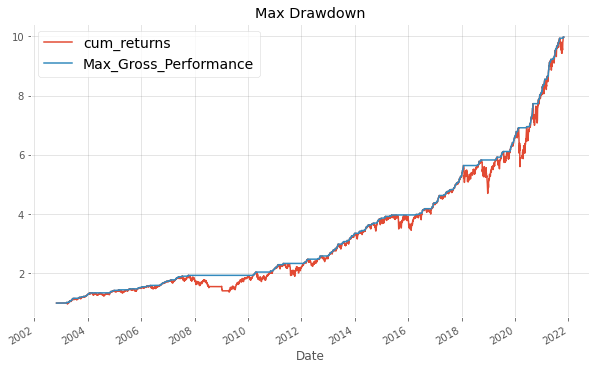

In [16]:
Period = (Drawdown[Drawdown == 0].index[1:].to_pydatetime() - 
          Drawdown[Drawdown == 0].index[:-1].to_pydatetime()
          )
Period.max()

data_df_2[["cum_returns", "Max_Gross_Performance"]
        ].dropna().plot(figsize = (10,6))

plt.title('Max Drawdown')

In [17]:
Sharpe = np.sqrt(253) * (data_df_2["pct_change"].mean() / data_df_2["pct_change"].std()
                         )
Sharpe

0.31519719256617695

In [18]:
Days = (data_df_2.index[-1] - data_df_2.index[0]).days

CAGR_market = (((data_df_2["Adj Close"][-1]) / (data_df_2["Adj Close"][1])) ** (365.0/Days)) - 1
CAGR_strategy =((data_df_2['cum_returns'].iloc[-1])**(365/Days)-1)
CAGR_strategy

0.12858258877128126

In [19]:
print(f'Our Sharpe Ratio: {Sharpe}')
print(f'CAGR: {CAGR_strategy}')
print(f'Max_Drawdown: {Drawdown.max()}')
print(f'Max_Drawdown_Days: {Period.max().days} days')
print(f'Total Portfolio Final: ${round(data_df_2["total_port_value"][-1],2):,}')

Our Sharpe Ratio: 0.31519719256617695
CAGR: 0.12858258877128126
Max_Drawdown: 1.309752763642341
Max_Drawdown_Days: 889 days
Total Portfolio Final: $4,681,829.8


### SMA Strategy

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib as mpl

In [21]:
pd.set_option("display.min_rows", 100)
pd.set_option("display.max_rows", 100)
pd.set_option("precision", 3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

%matplotlib inline

In [22]:
def obtain(stocks, start, end):
    def data(ticker):
        return(pdr.get_data_yahoo(ticker, 
                                  start = start,
                                  end = end)
              )
    
    stock_data = map(data, stocks)
    return(pd.concat(stock_data,
                     keys = stocks,
                     names = ['Ticker',"Date"]
                    )
           )

In [23]:
stocks = ["SPY"]
our_data = obtain(stocks,
                  dt.datetime(2002,11,1),
                  dt.datetime(2021,10,31)
                  )

Daily_Close_Prices = our_data[["Adj Close"]].reset_index().pivot("Date",
                                                                 "Ticker",
                                                                 "Adj Close")

In [24]:
Daily_Close_Prices.columns.name = None


In [25]:
def sma(data_df,window1,window2,stocks):
    for stock in stocks:
        data_df[f"SHORTER_SMA {stock}"] = Daily_Close_Prices[[f"{stock}"]].rolling(window = window1).mean()
        data_df[f"LONGER_SMA {stock}"]= Daily_Close_Prices[[f"{stock}"]].rolling(window = window2).mean()
        data_df[f"POSITIONS {stock}"] = 0
        data_df[f"POSITIONS {stock}"][window1:] = np.where(data_df[f"SHORTER_SMA {stock}"][window1:] > 
                                              data_df[f"LONGER_SMA {stock}"][window1:],
                                              1.0, 
                                              0.0)
        
        data_df[f"POSITIONS_DIFF_{stock}"] = data_df[f"POSITIONS {stock}"].diff()
    
        data_df[f"RETURNS {stock}"] = np.log(data_df[stock] / data_df[stock].shift(1))
        
        data_df[f"STRATEGY {stock}"] = data_df[f"POSITIONS {stock}"].shift(1) * data_df[f"RETURNS {stock}"]
        
    return data_df

In [26]:
data_df = sma(Daily_Close_Prices,20,50,['SPY'])

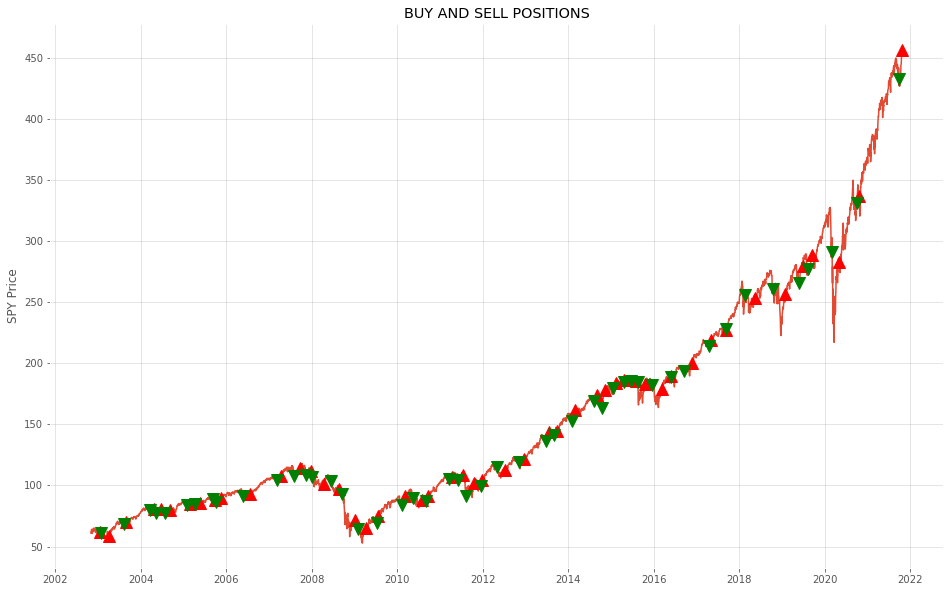

In [27]:
fig = plt.figure(figsize = (16, 10)) 

sub = fig.add_subplot(111,
                      ylabel = "Stock Price")

sub.plot(data_df["SPY"])

#Buying
sub.plot(data_df.loc[data_df.POSITIONS_DIFF_SPY == 1.0].index,
         data_df['SPY'][data_df.POSITIONS_DIFF_SPY == 1.0],
         "^",
         markersize = 12,
         color = "red")

# Selling
sub.plot(data_df.loc[data_df.POSITIONS_DIFF_SPY == -1.0].index,
         data_df['SPY'][data_df.POSITIONS_DIFF_SPY == -1.0],
         "v",
         markersize = 12,
         color = "green")

plt.ylabel('SPY Price')
plt.title('BUY AND SELL POSITIONS')
plt.show()

Text(0.5, 1.0, 'Returns')

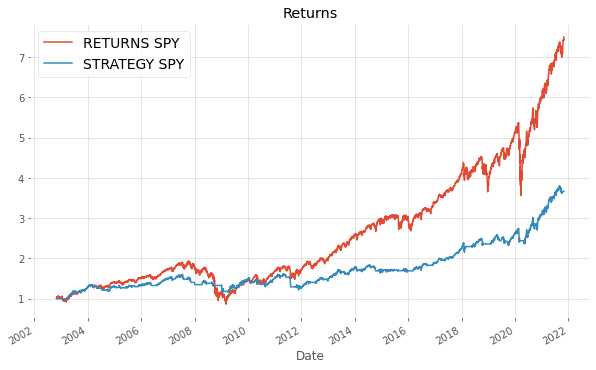

In [28]:
data_df['STRATEGY SPY'] = data_df['POSITIONS SPY'].shift(1)*data_df['RETURNS SPY']
data_df[['RETURNS SPY','STRATEGY SPY']].cumsum().apply(np.exp).plot(figsize=(10,6))
data_df.dropna(inplace=True)
plt.title('Returns')

In [29]:
data_df["cum_returns"] = data_df["STRATEGY SPY"].cumsum().apply(np.exp)
data_df["Max_Gross_Performance"] = data_df["cum_returns"].cummax()
Drawdown = data_df["Max_Gross_Performance"] - data_df["cum_returns"]
Drawdown.max()

0.4514433140985066

Text(0.5, 1.0, 'Max Drawdown')

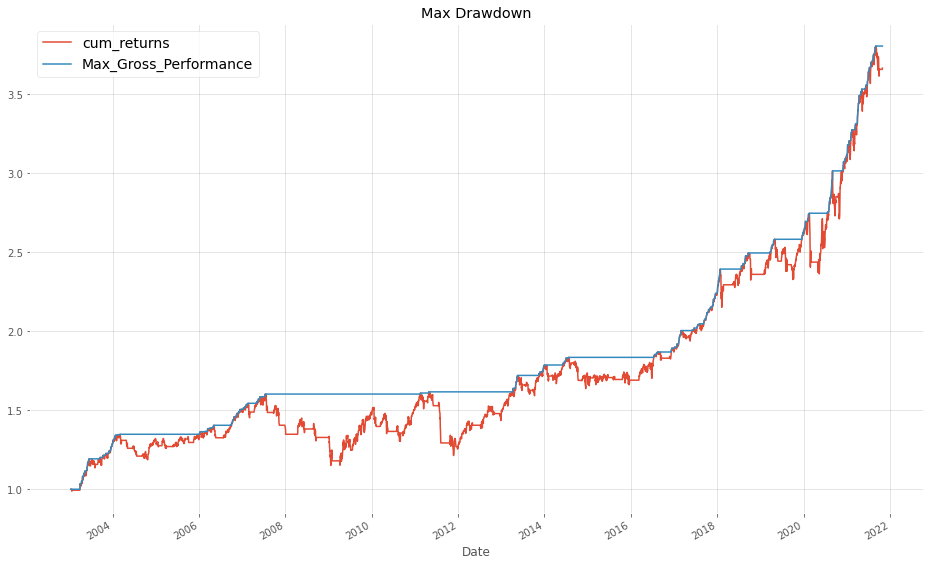

In [30]:
Period = (Drawdown[Drawdown == 0].index[1:].to_pydatetime() - 
          Drawdown[Drawdown == 0].index[:-1].to_pydatetime()
          )

Period.max()

data_df[["cum_returns", "Max_Gross_Performance"]
        ].dropna().plot(figsize = (16,10))

plt.title('Max Drawdown')


In [31]:
def sharpe(data_df, stocks):
    for stock in stocks:
        Sharpe = np.sqrt(253) * (data_df['returns'].mean() / data_df['returns'].std()
                         )
        print (f'{stock} SMA sharpe: {Sharpe}')

In [32]:
def CAGR(data_df,stocks):
    
    for stock in stocks:
        D = (data_df.index[-1] - data_df.index[0]).days

        CAGR = (((data_df[f"{stock}"][-1]) / (data_df[f"{stock}"][1])) ** (365.0/D)) - 1

        print (f'{stock} SMA CAGR: {CAGR}')

In [36]:
our_position = pd.DataFrame(index = data_df.index).fillna(0.0)
stocks_to_buy = 2700
our_position['stock'] = stocks_to_buy*data_df['POSITIONS SPY']

initial_capital = 500000
our_portfolio = our_position.multiply(data_df["SPY"], 
                                      axis = 0)

difference_in_shares_owned = our_position.diff()
difference_in_shares_owned

our_portfolio["our_holdings"] = (our_position.multiply(data_df["SPY"],
                                                       axis = 0)
                                 ).sum(axis = 1)


our_portfolio["our_cash"] = initial_capital - (difference_in_shares_owned.multiply(data_df["SPY"],
                                                                              axis = 0)
                                           ).sum(axis = 1).cumsum()

our_portfolio["total_port_value"] = our_portfolio["our_cash"] + our_portfolio["our_holdings"]
our_portfolio["returns"] = our_portfolio["total_port_value"].pct_change()

In [37]:
our_portfolio

,stock,our_holdings,our_cash,total_port_value,returns
Date,,,,,
2003-01-13,0.000,0.000,500000.000,500000.000,NaN
2003-01-14,0.000,0.000,500000.000,500000.000,0.000
2003-01-15,0.000,0.000,500000.000,500000.000,0.000
2003-01-16,0.000,0.000,500000.000,500000.000,0.000
2003-01-17,0.000,0.000,500000.000,500000.000,0.000
2003-01-21,166844.239,166844.239,333155.761,500000.000,0.000
2003-01-22,164825.399,164825.399,333155.761,497981.159,-0.004
2003-01-23,0.000,0.000,498990.590,498990.590,0.002
2003-01-24,0.000,0.000,498990.590,498990.590,0.000


In [38]:
sharpe(our_portfolio,['SPY'])
CAGR(data_df,['SPY'])
print(f'Max Drawdown: {Drawdown.max()}')
print(f'Max Drawdown Days: {Period.max()}')
print(f'total portfolio value: ${round(our_portfolio["total_port_value"][-1],2):,}')

SPY SMA sharpe: 0.6916611678712901
SPY SMA CAGR: 0.10970714156132289
Max Drawdown: 0.4514433140985066
Max Drawdown Days: 1309 days, 0:00:00
total portfolio value: $1,243,125.79
